In [3]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from plotting_scripts import label_point, pca_rpkm_mat
from homer_preprocessing import read_annotated_peaks

Set working directory

In [4]:
dataDirectory = '/data/mm10/Brain_MPSIIIA/ChIP/H3K27AC/Sox9/WT/'
inputDirectory = '/data/mm10/Brain_MPSIIIA/ChIP/input/SOX9/'
workingDirectory = '/home/h1bennet/brain_aging/results/03_Sox9_H3K27Ac/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

make folder for figures

In [5]:
if not os.path.isdir('./figures'):
    os.mkdir('./figures')

In [6]:
tagdirs = ['00_mouse_BL6_M_10day_SOX9_ChIP_H3K27ac_1_AL_20200610_ATTATCAA_CGACTCTC',
           '00_mouse_BL6_M_10day_SOX9_ChIP_H3K27ac_2_AL_20200610_GACCAGGA_CTGGCTAT',
           '01_mouse_BL6_M_3week_SOX9_ChIP_H3K27ac_1_AL_l20200911_CATAGAGT_TGCCACCA',
           '01_mouse_BL6_M_3week_SOX9main_ChIP_H3K27ac_2_AL_l20200925_AGTACTCC_AACCTGTT',
           '02_mouse_BL6_M_3month_SOX9_ChIP_H3K27ac_2_AL_20200205_AGTCAA',
           '03_mouse_MPSIIIAhet_M_4month_SOX9_ChIP_H3K27ac_1_AL_20200925_CATAGAGT_TGCCACCA',
           '03_mouse_MPSIIIAhet_M_4month_SOX9_ChIP_H3K27ac_2_AL_20201121_AATGCCTC_TCGATCCA']

In [7]:
inputdirs = ['00_mouse_BL6_M_3week_SOX9_input_AL_l20200911_TCGATATC_ACACGAGT',
             '00_mouse_BL6_M_3week_SOX9_input_AL_l20200911_TCGATATC_ACACGAGT',
             '00_mouse_BL6_M_3week_SOX9_input_AL_l20200911_TCGATATC_ACACGAGT',
             '00_mouse_BL6_M_3week_SOX9_input_AL_l20200911_TCGATATC_ACACGAGT',
             '01_mouse_BL6_M_3month_SOX9_input_2012_JOS_l20200205_ATGTCA',
             '01_mouse_BL6_M_3month_SOX9_input_2012_JOS_l20200205_ATGTCA',
             '01_mouse_BL6_M_3month_SOX9_input_2012_JOS_l20200205_ATGTCA']

# Call Peaks with matched inputs

In [16]:
%%bash
# delete the existing script file
rm ./peakCalling_homer.sh
# create a script file
touch ./peakCalling_homer.sh

# if directories don't exist, create them
if [ ! -d ./peak_files/ ]; then mkdir ./peak_files; fi

In [26]:

with open('./peakCalling_homer.sh', 'w') as f:
    for tagdir, inputdir in zip(tagdirs, inputdirs):
        print('analyzing:', tagdir)
        print('input:', inputdir)
        print()
        find_peaks_fw = ['findPeaks', dataDirectory + '/' + tagdir,
                          '-i', inputDirectory + '/' + inputdir,
                          '-size 1000 -minDist 2500',
                          '-o',
                          workingDirectory + '/peak_files/' + tagdir + '_fixedwidth_peaks.tsv',
                          '&', '\n\n']
        find_peaks_vw = ['findPeaks', dataDirectory + '/' + tagdir,
                          '-i', inputDirectory + '/' + inputdir,
                          '-region',
                          '-size 1000 -minDist 2500',
                          '-o',
                          workingDirectory + '/peak_files/' + tagdir + '_variablewidth_peaks.tsv',
                          '&', '\n\n']
        
        find_peaks_nfr = ['findPeaks', dataDirectory + '/' + tagdir,
                          '-i', inputDirectory + '/' + inputdir,
                          '-nfr',
                          '-o',
                          workingDirectory + '/peak_files/' + tagdir + '_nfr_peaks.tsv',
                          '&', '\n\n']
        
        find_peaks_nfrmd = ['findPeaks', dataDirectory + '/' + tagdir,
                          '-i', inputDirectory + '/' + inputdir,
                          '-nfr', '-minDist 500',
                          '-o',
                          workingDirectory + '/peak_files/' + tagdir + '_nfrmd_peaks.tsv',
                          '&', '\n\n']
        find_peaks_nfrmd1000 = ['findPeaks', dataDirectory + '/' + tagdir,
                                '-i', inputDirectory + '/' + inputdir,
                                '-nfr', '-minDist 1000',
                                '-o',
                                workingDirectory + '/peak_files/' + tagdir + '_nfrmd1000_peaks.tsv',
                                '&', '\n\n']
        
        find_peaks_nfrmd2000 = ['findPeaks', dataDirectory + '/' + tagdir,
                                '-i', inputDirectory + '/' + inputdir,
                                '-nfr', '-minDist 2000',
                                '-o',
                                workingDirectory + '/peak_files/' + tagdir + '_nfrmd2000_peaks.tsv',
                                '&', '\n\n']
#         # write commands to file
#         f.write(' '.join(find_peaks_fw))
#         f.write(' '.join(find_peaks_vw))
#         f.write(' '.join(find_peaks_nfr))
#         f.write(' '.join(find_peaks_nfrmd))
        f.write(' '.join(find_peaks_nfrmd1000))
        f.write(' '.join(find_peaks_nfrmd2000))                        
    f.close()

analyzing: 00_mouse_BL6_M_10day_SOX9_ChIP_H3K27ac_1_AL_20200610_ATTATCAA_CGACTCTC
input: 00_mouse_BL6_M_3week_SOX9_input_AL_l20200911_TCGATATC_ACACGAGT

analyzing: 00_mouse_BL6_M_10day_SOX9_ChIP_H3K27ac_2_AL_20200610_GACCAGGA_CTGGCTAT
input: 00_mouse_BL6_M_3week_SOX9_input_AL_l20200911_TCGATATC_ACACGAGT

analyzing: 01_mouse_BL6_M_3week_SOX9_ChIP_H3K27ac_1_AL_l20200911_CATAGAGT_TGCCACCA
input: 00_mouse_BL6_M_3week_SOX9_input_AL_l20200911_TCGATATC_ACACGAGT

analyzing: 01_mouse_BL6_M_3week_SOX9main_ChIP_H3K27ac_2_AL_l20200925_AGTACTCC_AACCTGTT
input: 00_mouse_BL6_M_3week_SOX9_input_AL_l20200911_TCGATATC_ACACGAGT

analyzing: 02_mouse_BL6_M_3month_SOX9_ChIP_H3K27ac_2_AL_20200205_AGTCAA
input: 01_mouse_BL6_M_3month_SOX9_input_2012_JOS_l20200205_ATGTCA

analyzing: 03_mouse_MPSIIIAhet_M_4month_SOX9_ChIP_H3K27ac_1_AL_20200925_CATAGAGT_TGCCACCA
input: 01_mouse_BL6_M_3month_SOX9_input_2012_JOS_l20200205_ATGTCA

analyzing: 03_mouse_MPSIIIAhet_M_4month_SOX9_ChIP_H3K27ac_2_AL_20201121_AATGCCTC_TCGAT

# Merge peaks

In [33]:
%%bash
if [ ! -d ./merged_peaks/ ]; then mkdir ./merged_peaks; fi
# mergePeaks ./peak_files/*variablewidth* > merged_peaks/vw_peaks_merged.txt
# mergePeaks ./peak_files/*fixedwidth* > merged_peaks/fw_peaks_merged.txt
mergePeaks ./peak_files/*nfr_peaks.tsv* > merged_peaks/nfr_peaks_merged.txt
# mergePeaks ./peak_files/*nfrmd* > merged_peaks/nfrmd_peaks_merged.txt
# mergePeaks ./peak_files/*nfrmd1000* > merged_peaks/nfrmd1000_peaks_merged.txt
# mergePeaks ./peak_files/*nfrmd2000* > merged_peaks/nfrmd2000_peaks_merged.txt

	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing ./peak_files/00_mouse_BL6_M_10day_SOX9_ChIP_H3K27ac_1_AL_20200610_ATTATCAA_CGACTCTC_nfr_peaks.tsv (23711 total) and ./peak_files/00_mouse_BL6_M_10day_SOX9_ChIP_H3K27ac_1_AL_20200610_ATTATCAA_CGACTCTC_nfr_peaks.tsv (23711 total)
	Comparing ./peak_files/00_mouse_BL6_M_10day_SOX9_ChIP_H3K27ac_1_AL_20200610_ATTATCAA_CGACTCTC_nfr_peaks.tsv (23711 total) and ./peak_files/00_mouse_BL6_M_10day_SOX9_ChIP_H3K27ac_2_AL_20200610_GACCAGGA_CTGGCTAT_nfr_peaks.tsv (17685 total)
	Comparing ./peak_files/00_mouse_BL6_M_10day_SOX9_ChIP_H3K27ac_1_AL_20200610_ATTATCAA_CGACTCTC_nfr_peaks.tsv (23711 total) and ./peak_files/01_mouse_BL6_M_3week_SOX9_ChIP_H3K27ac_1_AL_l20200911_CATAGAGT_TGCCACCA_nfr_peaks.tsv (11059 total)
	Comparing ./peak_files/00_mouse_BL6_M_10day_SOX9_ChIP_H3K27ac_1_AL_20200610_ATTATCAA_CGACTCTC_nfr_peaks.tsv (23711 total) and ./peak_files/01_mouse_BL6_M_3week_SOX9main_ChIP_H3K27ac_2_AL_l20200925_AGTACT

Convert merged peaks to bed files

In [30]:
%%bash
if [ ! -d ./bed_files/ ]; then mkdir ./bed_files; fi

# delete the existing script file
rm ./make_bed.sh
# create a script file
touch ./make_bed.sh

for peakfile in ./merged_peaks/*;
do bedfile=${peakfile/merged_peaks/bed_files};
bedfile=${bedfile/.txt/.bed}
echo "pos2bed.pl $peakfile > $bedfile" >> make_bed.sh
done


Best to add labels to the bed files so that we can use them on the browser

In [31]:
%%bash

echo 'track name="Sox9_H3K27Ac_FW" description="Sox9 Nuclei H3K27Ac Chip-seq Fixed Width Peaks"' \
| cat - ./bed_files/fw_peaks_merged.bed \
> temp && mv temp ./bed_files/fw_peaks_merged.bed

echo 'track name="Sox9_H3K27Ac_NFR" description="Sox9 Nuclei H3K27Ac Chip-seq Nucleosome Free Regions"' \
| cat - ./bed_files/nfr_peaks_merged.bed \
> temp && mv temp ./bed_files/nfr_peaks_merged.bed

echo 'track name="Sox9_H3K27Ac_NFR_MinDist500" description="Sox9 Nuclei H3K27Ac Chip-seq Nucleosome Free Regions MinDist 500"' \
| cat - ./bed_files/nfrmd_peaks_merged.bed \
> temp && mv temp ./bed_files/nfrmd_peaks_merged.bed

echo 'track name="Sox9_H3K27Ac_NFR_MinDist1000" description="Sox9 Nuclei H3K27Ac Chip-seq Nucleosome Free Regions MinDist 1000"' \
| cat - ./bed_files/nfrmd1000_peaks_merged.bed \
> temp && mv temp ./bed_files/nfrmd1000_peaks_merged.bed

echo 'track name="Sox9_H3K27Ac_NFR_MinDist2000" description="Sox9 Nuclei H3K27Ac Chip-seq Nucleosome Free Regions MinDist 2000"' \
| cat - ./bed_files/nfrmd2000_peaks_merged.bed \
> temp && mv temp ./bed_files/nfrmd2000_peaks_merged.bed

echo 'track name="Sox9_H3K27Ac_VW" description="Sox9 Nuclei H3K27Ac Chip-seq Variable Width Peaks"' \
| cat - ./bed_files/vw_peaks_merged.bed \
> temp && mv temp ./bed_files/vw_peaks_merged.bed

## Side mission - assess whether calling nucleosome free regions yields good enough estimates to use for differential peak calling and motif finding

We will do this by annotating peaks as histograms

In [6]:
%%bash
# delete the existing script file
rm ./annotatePeaks_hist.sh
# create a script file
touch ./annotatePeaks_hist.sh

# make folder to store histogram annotations
if [ ! -d ./hist_peaks/ ]; then mkdir ./hist_peaks; fi

In [7]:
tagdirs_full = [dataDirectory+i for i in tagdirs]

In [8]:
with open('./annotatePeaks_hist.sh', 'w') as f:
    annotate_fw = ['annotatePeaks.pl', './merged_peaks/fw_peaks_merged.txt',
                   'mm10', '-size 4000', '-hist 10', '-d \\\n',
                   ' \\\n'.join(tagdirs_full), '>',
                   './hist_peaks/fw_peaks_merged_hist.txt &\n\n']
    
    annotate_nfr = ['annotatePeaks.pl', './merged_peaks/nfr_peaks_merged.txt',
                    'mm10', '-size 4000', '-hist 10', '-d \\\n',
                    ' \\\n'.join(tagdirs_full), '>',
                    './hist_peaks/nfr_peaks_merged_hist.txt &\n\n']
    
    annotate_vw = ['annotatePeaks.pl', './merged_peaks/vw_peaks_merged.txt',
                   'mm10', '-size 4000', '-hist 10', '-d \\\n',
                   ' \\\n'.join(tagdirs_full), '>',
                   './hist_peaks/vw_peaks_merged_hist.txt &\n\n']
    
    annotate_fw_g = ['annotatePeaks.pl', './merged_peaks/fw_peaks_merged.txt',
                   'mm10', '-size 4000', '-hist 40', '-ghist', '-d \\\n',
                   ' \\\n'.join(tagdirs_full), '>',
                   './hist_peaks/fw_peaks_merged_ghist.txt &\n\n']
    
    annotate_nfr_g = ['annotatePeaks.pl', './merged_peaks/nfr_peaks_merged.txt',
                    'mm10', '-size 4000', '-hist 40', '-ghist', '-d \\\n',
                    ' \\\n'.join(tagdirs_full), '>',
                    './hist_peaks/nfr_peaks_merged_ghist.txt &\n\n']
    
    annotate_vw_g = ['annotatePeaks.pl', './merged_peaks/vw_peaks_merged.txt',
                   'mm10', '-size 4000', '-hist 40', '-ghist', '-d \\\n',
                   ' \\\n'.join(tagdirs_full), '>',
                   './hist_peaks/vw_peaks_merged_ghist.txt &\n\n']

    f.write(' '.join(annotate_fw_g))    
    f.write(' '.join(annotate_nfr_g))
    f.write(' '.join(annotate_vw_g))
    
    f.close()

### Read in and examine histograms

In [77]:
for f in glob.glob('./hist_peaks/*_hist.txt'):
    peaktype = f.split('/')[-1].split('_')[0]
    df = pd.read_csv(f,
                     sep='\t',
                     index_col=0)
    df.index.rename('distance', inplace=True)
    df.columns = df.columns.str.split('/').str[-1]
    
    for i in range(0,df.shape[1],3):
        fig, ax =plt.subplots(figsize=(5,5))

        ax.plot(df.index,
                df.iloc[:, i])
        ax.set_title(df.columns[i])
        plt.savefig('./figures/'+df.columns[i].replace(' ', '_')+'_'+peaktype+'.png',
                    bbox_inches='tight')
        plt.close()

./hist_peaks/fw_peaks_merged_hist.txt
fw
./hist_peaks/nfr_peaks_merged_hist.txt
nfr
./hist_peaks/vw_peaks_merged_hist.txt
vw


### Read in and examine heatmaps
These files are much bigger than the histograms. Their structure is that each tag directory passed is repeated as another set of columns, the columns representing distance from the peak center. Since we made a 4000 bp window in bins of 40 we have 101 bins per sample. We will need to break up the DF into chunks of 101 columns. (7 total, one for each tag directory)

In [9]:
df = pd.read_csv('./hist_peaks/nfr_peaks_merged_ghist.txt',
                 sep='\t',
                 index_col=0)

### Next: Annotate peaks

In [31]:
%%bash
# delete the existing script file
rm ./annotatePeaks_homer.sh
# create a script file
touch ./annotatePeaks_homer.sh

if [ ! -d ./annotated_peaks/ ]; then mkdir ./annotated_peaks; fi

In [32]:
tagdirs_full = [dataDirectory+i for i in tagdirs]

In [33]:
with open('./annotatePeaks_homer.sh', 'w') as f:
    annotate_fw_raw = ['annotatePeaks.pl', './merged_peaks/fw_peaks_merged.txt',
                       'mm10', '-size 1000', '-raw', '-d \\\n',
                       ' \\\n'.join(tagdirs_full), '>',
                       './annotated_peaks/ann_raw_idr_fw_peaks_merged.txt &\n\n']
    
    annotate_fw_norm = ['annotatePeaks.pl', './merged_peaks/fw_peaks_merged.txt',
                       'mm10', '-size 1000', '-norm 1e7', '-d \\\n',
                       ' \\\n'.join(tagdirs_full), '>',
                       './annotated_peaks/ann_norm_idr_fw_peaks_merged.txt &\n\n']
    
    annotate_nfr_raw = ['annotatePeaks.pl', './merged_peaks/nfr_peaks_merged.txt',
                       'mm10', '-size 1000', '-raw', '-d \\\n',
                       ' \\\n'.join(tagdirs_full), '>',
                       './annotated_peaks/ann_raw_idr_nfr_peaks_merged.txt &\n\n']
    
    annotate_nfr_norm = ['annotatePeaks.pl', './merged_peaks/nfr_peaks_merged.txt',
                       'mm10', '-size 1000', '-norm 1e7', '-d \\\n',
                       ' \\\n'.join(tagdirs_full), '>',
                       './annotated_peaks/ann_norm_idr_nfr_peaks_merged.txt &\n\n']
    
    annotate_vw_raw = ['annotatePeaks.pl', './merged_peaks/vw_peaks_merged.txt',
                   'mm10', '-size given', '-raw', '-d \\\n',
                   ' \\\n'.join(tagdirs_full), '>',
                   './annotated_peaks/ann_raw_idr_vw_peaks_merged.txt &\n\n']

    annotate_vw_norm = ['annotatePeaks.pl', './merged_peaks/vw_peaks_merged.txt',
                       'mm10', '-size given', '-norm 1e7', '-d \\\n',
                       ' \\\n'.join(tagdirs_full), '>',
                       './annotated_peaks/ann_norm_idr_vw_peaks_merged.txt &']
    
    f.write(' '.join(annotate_fw_raw))    
    f.write(' '.join(annotate_fw_norm))
    f.write(' '.join(annotate_nfr_raw))    
    f.write(' '.join(annotate_nfr_norm))
    f.write(' '.join(annotate_vw_raw))    
    f.write(' '.join(annotate_vw_norm))
    
    f.close()

# Summary plots

In [12]:
if not os.path.isdir('./figures'):
    os.mkdir('./figures')

Read in annotation files

In [35]:
# import annotation file
df, mat = read_annotated_peaks('./annotated_peaks/ann_norm_idr_vw_peaks_merged.txt')

# # try with dropped sample
# dropsamp = ['00_mouse_BL6_M_8week_PU1_ChIP_H3K27Ac_3_AL_20191226_GTAGAG_ds']

# df = df.drop(dropsamp, axis=1)
# mat = mat.drop(dropsamp, axis=1)

# quantile normalize data
mat_quant = quantile_normalize_df(mat)

Filter low tag peaks

In [36]:
mat.columns

Index(['/data/mm10/Brain_MPSIIIA/ChIP/H3K27AC/Sox9/WT/00_mouse_BL6_M_10day_SOX9_ChIP_H3K27ac_1_AL_20200610_ATTATCAA_CGACTCTC',
       '/data/mm10/Brain_MPSIIIA/ChIP/H3K27AC/Sox9/WT/00_mouse_BL6_M_10day_SOX9_ChIP_H3K27ac_2_AL_20200610_GACCAGGA_CTGGCTAT',
       '/data/mm10/Brain_MPSIIIA/ChIP/H3K27AC/Sox9/WT/01_mouse_BL6_M_3week_SOX9_ChIP_H3K27ac_1_AL_l20200911_CATAGAGT_TGCCACCA',
       '/data/mm10/Brain_MPSIIIA/ChIP/H3K27AC/Sox9/WT/01_mouse_BL6_M_3week_SOX9main_ChIP_H3K27ac_2_AL_l20200925_AGTACTCC_AACCTGTT',
       '/data/mm10/Brain_MPSIIIA/ChIP/H3K27AC/Sox9/WT/02_mouse_BL6_M_3month_SOX9_ChIP_H3K27ac_2_AL_20200205_AGTCAA',
       '/data/mm10/Brain_MPSIIIA/ChIP/H3K27AC/Sox9/WT/03_mouse_MPSIIIAhet_M_4month_SOX9_ChIP_H3K27ac_1_AL_20200925_CATAGAGT_TGCCACCA',
       '/data/mm10/Brain_MPSIIIA/ChIP/H3K27AC/Sox9/WT/03_mouse_MPSIIIAhet_M_4month_SOX9_ChIP_H3K27ac_2_AL_20201121_AATGCCTC_TCGATCCA'],
      dtype='object')

In [39]:
thresh = 16

print(mat.shape[0], 'total peaks')
print('filtering low tag count peaks')
peaks = []
mat = mat.reindex(mat.index[(mat > thresh).sum(1) > 1])
mat = mat.dropna(how='all')
mat_quant = mat_quant.reindex(mat.index[(mat > thresh).sum(1) > 1])
mat_quant = mat_quant.dropna(how='all')
print(mat.shape[0], 'total peaks')

mat_distal = mat.reindex(df.loc[np.abs(df['Distance to TSS']) >= 3000.0].index.tolist())
mat_distal.dropna(inplace=True)

37993 total peaks
filtering low tag count peaks
32770 total peaks


### Make folder for figures

In [40]:
if not os.path.isdir('./figures'):
    os.mkdir('./figures')

### Mean variance plot

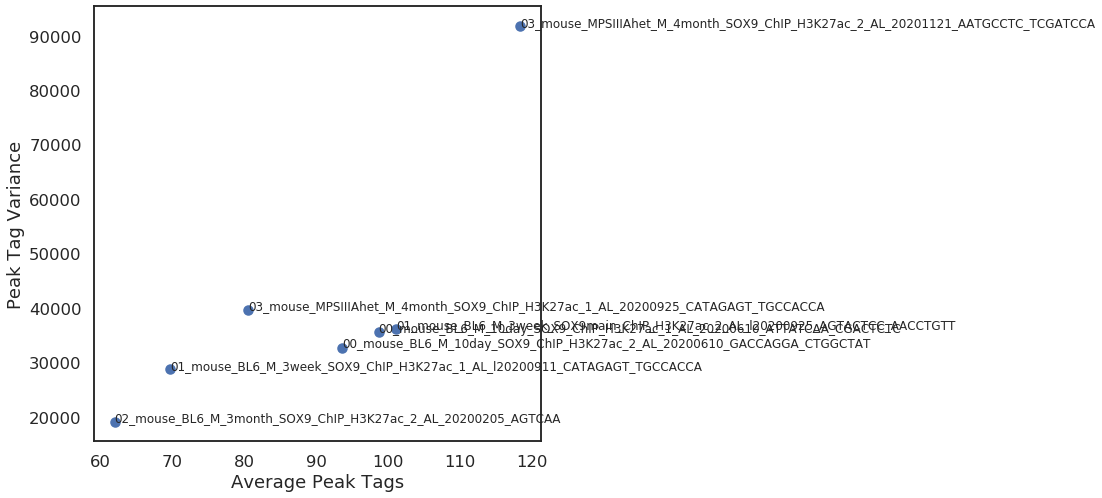

In [48]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(mat.mean(), mat.var())
plt.xlabel('Average Peak Tags')
plt.ylabel('Peak Tag Variance')
label_point(mat.mean(),
            mat.var(),
            mat.columns.str.split('/').str[-1],
            plt.gca())

plt.savefig('./figures/mean_variance_plot.png', bbox_inches='tight')

### Try with quantile normalized data

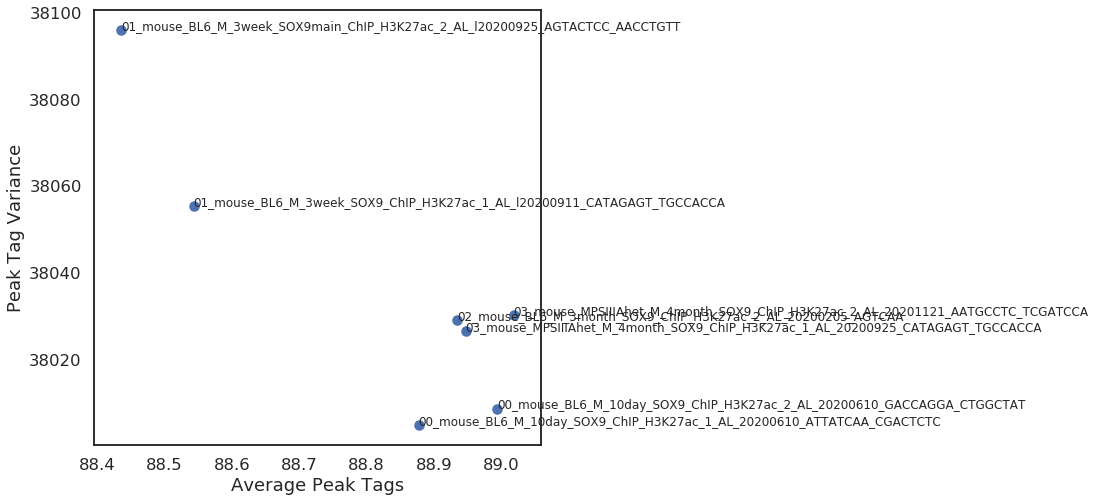

In [49]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(mat_quant.mean(), mat_quant.var())
plt.xlabel('Average Peak Tags')
plt.ylabel('Peak Tag Variance')
label_point(mat_quant.mean(),
            mat_quant.var(),
            mat_quant.columns.str.split('/').str[-1],
            plt.gca())

plt.savefig('./figures/mean_variance_plot_quantnorm.png', bbox_inches='tight')

### Correlation heatmap

In [50]:
mat.columns = mat.columns.str.split('/').str[-1]
mat_quant.columns = mat_quant.columns.str.split('/').str[-1]
mat_distal.columns = mat_distal.columns.str.split('/').str[-1]

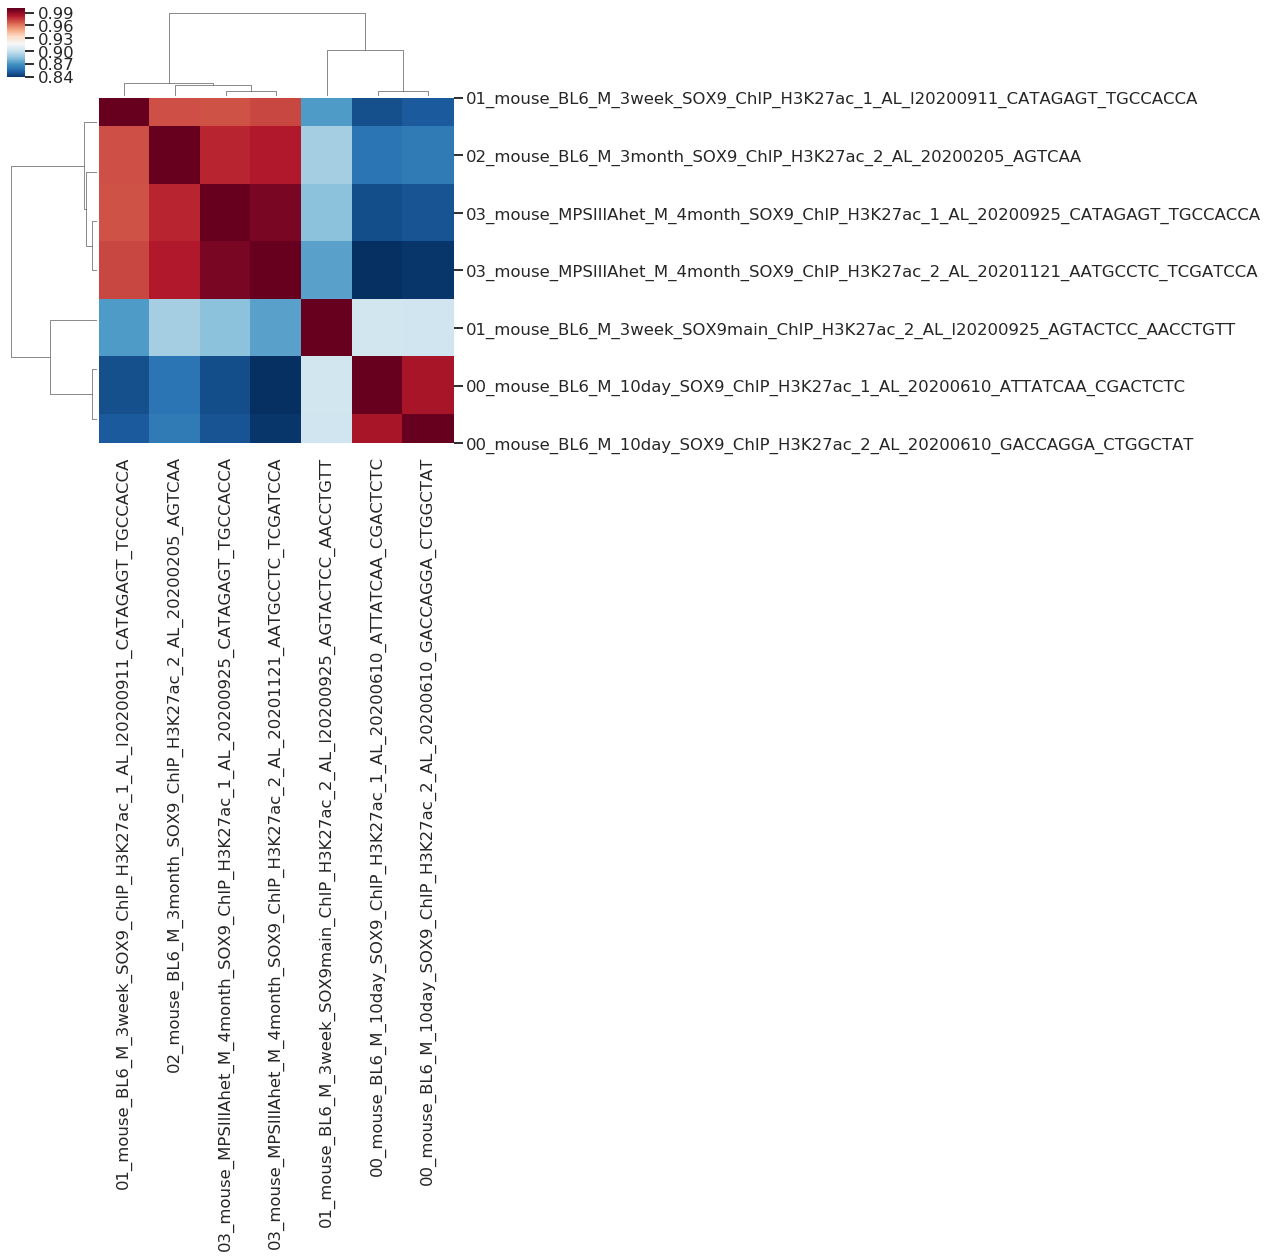

In [51]:
cm = sns.clustermap(
    mat.corr(),
    cmap='RdBu_r',
    figsize=(8,8))

# adjust y axis rotation
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0);

plt.savefig('./figures/h3k27ac_correlation_heatmap.png', bbox_inches='tight')

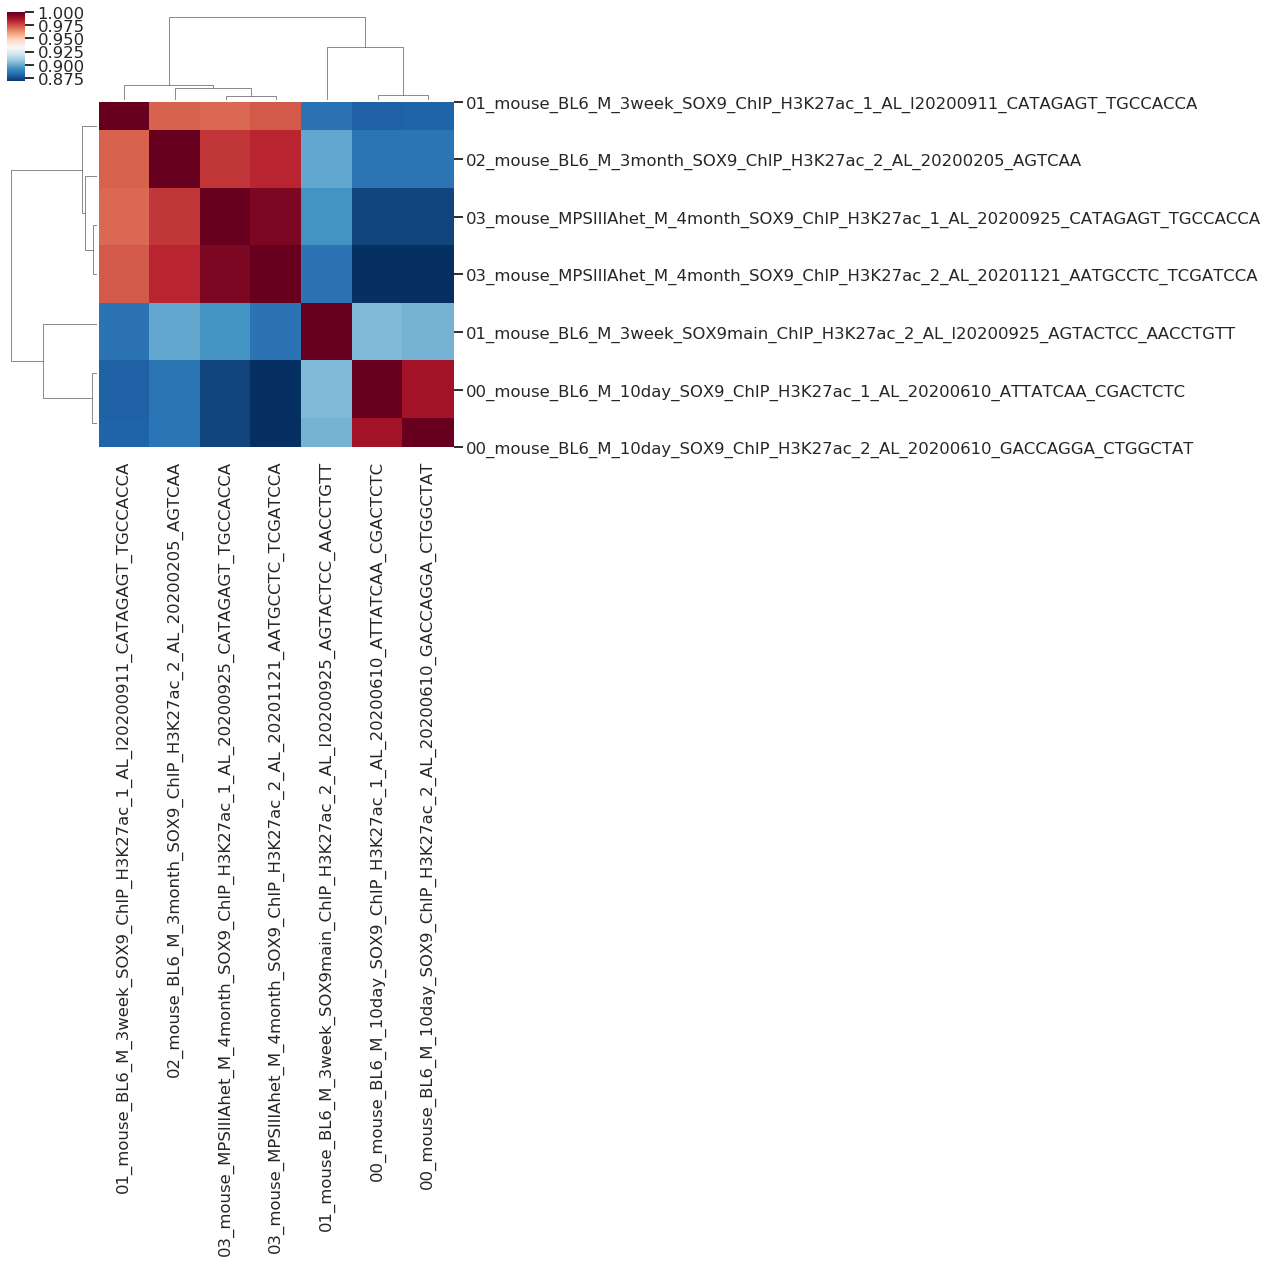

In [52]:
cm = sns.clustermap(
    mat_distal.corr(),
    cmap='RdBu_r',
    figsize=(8,8))

# adjust y axis rotation
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0);

plt.savefig('./figures/h3k27ac_correlation_heatmap_distal.png', bbox_inches='tight')

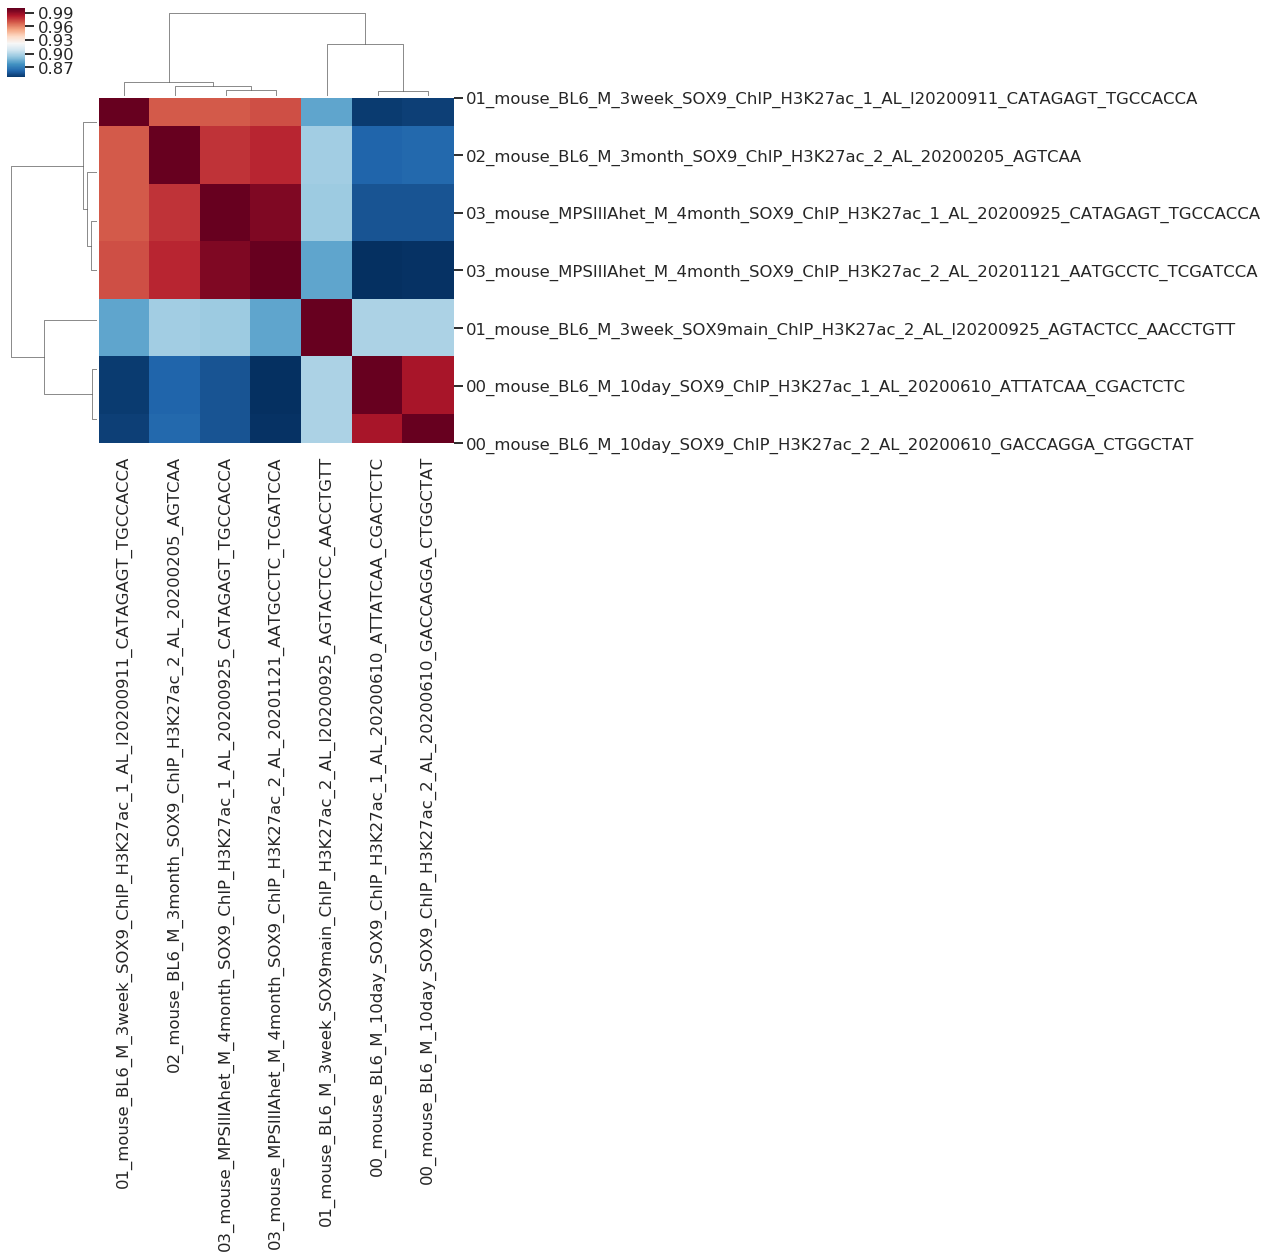

In [53]:
cm = sns.clustermap(
    mat_quant.corr(),
    cmap='RdBu_r',
    figsize=(8,8))

# adjust y axis rotation
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0);

plt.savefig('./figures/h3k27ac_correlation_heatmap_quantnorm.png', bbox_inches='tight')

# Principal Component Analysis

Create sample ID data frame for ease of plotting

In [54]:
# this part must be done manually - use the sample ID fields to pick out
# identifiers for each sample.
samples = pd.Series(mat.columns)
group = samples.str.split('_').str[0]
strain = samples.str.split('_').str[2]
gender = samples.str.split('_').str[3]
age = samples.str.split('_').str[4]
cell = samples.str.split('_').str[5]
rep = samples.str.split('_').str[8]
sampledate = samples.str.split('_').str[9]
                                        
samplesDF = pd.DataFrame([pd.Series(samples),
                          pd.Series(group),
                          pd.Series(strain),
                          pd.Series(gender),
                          pd.Series(age),
                          pd.Series(cell),
                          pd.Series(rep),
                          pd.Series(sampledate)],
                         index=['mouse',
                                'group',
                                'strain',
                                'gender',
                                'age',
                                'celltype',
                                'rep',
                                'sample_date']).T

In [55]:
samplesDF

,mouse,group,strain,gender,age,celltype,rep,sample_date
0,00_mouse_BL6_M_10day_SOX9_ChIP_H3K27ac_1_AL_20...,00,BL6,M,10day,SOX9,1,AL
1,00_mouse_BL6_M_10day_SOX9_ChIP_H3K27ac_2_AL_20...,00,BL6,M,10day,SOX9,2,AL
2,01_mouse_BL6_M_3week_SOX9_ChIP_H3K27ac_1_AL_l2...,01,BL6,M,3week,SOX9,1,AL
3,01_mouse_BL6_M_3week_SOX9main_ChIP_H3K27ac_2_A...,01,BL6,M,3week,SOX9main,2,AL
4,02_mouse_BL6_M_3month_SOX9_ChIP_H3K27ac_2_AL_2...,02,BL6,M,3month,SOX9,2,AL
5,03_mouse_MPSIIIAhet_M_4month_SOX9_ChIP_H3K27ac...,03,MPSIIIAhet,M,4month,SOX9,1,AL
6,03_mouse_MPSIIIAhet_M_4month_SOX9_ChIP_H3K27ac...,03,MPSIIIAhet,M,4month,SOX9,2,AL


### Look at PCA plots for all the samples

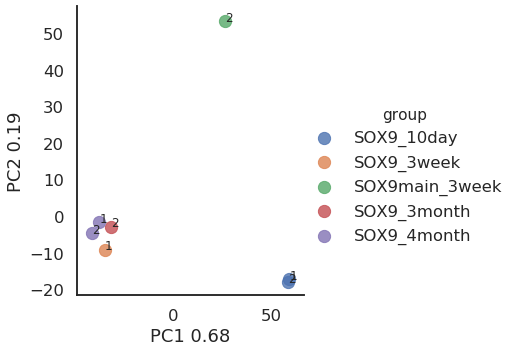

In [56]:
pca, exp_var, pcs = pca_rpkm_mat(rpkm=mat,
                                 group_labels=samplesDF.celltype+'_'+samplesDF.age,
                                 plot_size=5,
                                 n_pca=3)

label_point(pca.PC1,
            pca.PC2,
            samplesDF.rep,
            plt.gca())

plt.savefig('./figures/h3k27ac_pca1_pca2.png', bbox_inches='tight')

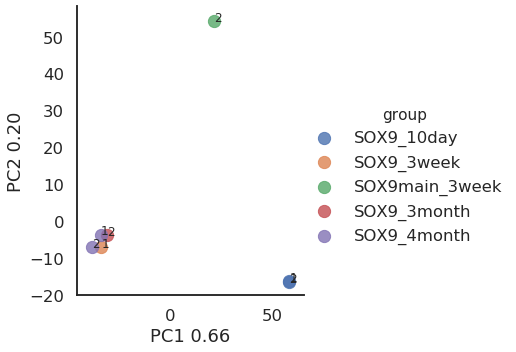

In [57]:
pca, exp_var, pcs = pca_rpkm_mat(rpkm=mat_quant,
                                 group_labels=samplesDF.celltype+'_'+samplesDF.age,
                                 plot_size=5,
                                 n_pca=3)

label_point(pca.PC1,
            pca.PC2,
            samplesDF.rep,
            plt.gca())

plt.savefig('./figures/h3k27ac_quantnorm_pca1_pca2.png', bbox_inches='tight')

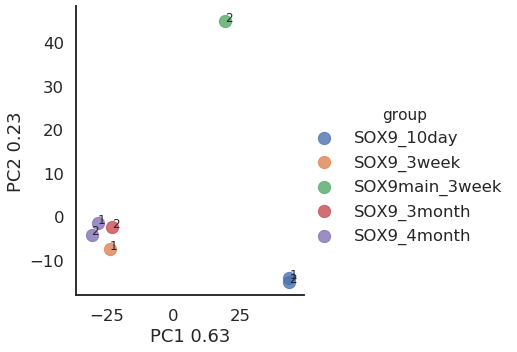

In [58]:
pca, exp_var, pcs = pca_rpkm_mat(rpkm=mat_distal,
                                 group_labels=samplesDF.celltype+'_'+samplesDF.age,
                                 plot_size=5,
                                 n_pca=3)

label_point(pca.PC1,
            pca.PC2,
            samplesDF.rep,
            plt.gca())

plt.savefig('./figures/h3k27ac_distal_pca1_pca2.png', bbox_inches='tight')

# Plot average tag counts across peaks to assess differences

This part is sensitive to whether we include the 3 week sox9 data. it might be best to wait to do downstream analysis on this until we have deeper sequenced SOX9_10day data.

In [62]:
import itertools

## un-normalized peaks

In [77]:
mat.columns

Index(['00_mouse_BL6_M_10day_SOX9_ChIP_H3K27ac_1_AL_20200610_ATTATCAA_CGACTCTC',
       '00_mouse_BL6_M_10day_SOX9_ChIP_H3K27ac_2_AL_20200610_GACCAGGA_CTGGCTAT',
       '01_mouse_BL6_M_3week_SOX9_ChIP_H3K27ac_1_AL_l20200911_CATAGAGT_TGCCACCA',
       '01_mouse_BL6_M_3week_SOX9main_ChIP_H3K27ac_2_AL_l20200925_AGTACTCC_AACCTGTT',
       '02_mouse_BL6_M_3month_SOX9_ChIP_H3K27ac_2_AL_20200205_AGTCAA',
       '03_mouse_MPSIIIAhet_M_4month_SOX9_ChIP_H3K27ac_1_AL_20200925_CATAGAGT_TGCCACCA',
       '03_mouse_MPSIIIAhet_M_4month_SOX9_ChIP_H3K27ac_2_AL_20201121_AATGCCTC_TCGATCCA'],
      dtype='object')

In [78]:
groups = ['Young', 'Old']
columns = [[0,1],
           [4,5,6]]

avg_tags = {}

for group, col in zip(groups, columns):
    avg_tags[group] = mat.iloc[:, col].mean(1)
    
avg_tags_df = pd.DataFrame(avg_tags)

/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


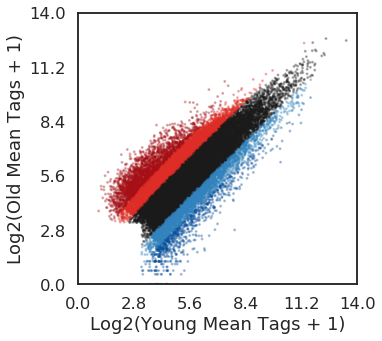

In [79]:
# set loop variables
mincount=8
thresh=[2,4]
thresh_color = {'down': ['#de2d26', '#a50f15'],
                'up': ['#3182bd', '#08519c']}
peak_count = {}

n_ticks = 5

for i, j in itertools.combinations(groups, 2):

    fig, ax = plt.subplots(figsize=(5,5))

    # filter low tag peaks
    df_tmp = avg_tags_df.loc[(avg_tags_df.loc[:, i] >= mincount) | (avg_tags_df.loc[:, j] >= mincount)]

    # set colors
    df_tmp['colors'] = 'k'
    df_tmp.loc[(df_tmp.loc[:, j] / (df_tmp.loc[:, i] + 1)) >= thresh[0], 'colors'] = thresh_color['up'][0]
    peak_count['up_'+str(thresh[0])] = ((df_tmp.loc[:, j] / (df_tmp.loc[:, i] + 1)) >= thresh[0]).sum()
    
    df_tmp.loc[(df_tmp.loc[:, j] / (df_tmp.loc[:, i] + 1)) <= 1/thresh[0], 'colors'] = thresh_color['down'][0]
    peak_count['down_'+str(thresh[0])] = ((df_tmp.loc[:, j] / (df_tmp.loc[:, i] + 1)) <= 1/thresh[0]).sum()
    
    df_tmp.loc[(df_tmp.loc[:, j] / (df_tmp.loc[:, i] + 1)) >= thresh[1], 'colors'] = thresh_color['up'][1]
    peak_count['up_'+str(thresh[1])] = ((df_tmp.loc[:, j] / (df_tmp.loc[:, i] + 1)) >= thresh[1]).sum()

    df_tmp.loc[(df_tmp.loc[:, j] / (df_tmp.loc[:, i] + 1)) <= 1/thresh[1], 'colors'] = thresh_color['down'][1]
    peak_count['down_'+str(thresh[1])] = ((df_tmp.loc[:, j] / (df_tmp.loc[:, i] + 1)) <= 1/thresh[1]).sum()

    ax.scatter(np.log2(df_tmp.loc[:, j]+1),
               np.log2(df_tmp.loc[:, i]+1),
               s=2,
               c=df_tmp.colors,
               alpha=0.3)

    # set axis limits
    countmax = np.max([np.max(np.log2(df_tmp.loc[:, j]+1)), np.max(np.log2(df_tmp.loc[:, i]+1))])
    ax.set_xlim([0,np.ceil(countmax)])
    ax.set_ylim([0,np.ceil(countmax)])
    
    # fix ticks
    ax.set_xticks(np.arange(0, np.ceil(countmax)+1, np.ceil(countmax) / n_ticks))
    ax.set_yticks(np.arange(0, np.ceil(countmax)+1, np.ceil(countmax) / n_ticks))
    
    # label axes
    ax.set_xlabel('Log2(%s Mean Tags + 1)' % i)
    ax.set_ylabel('Log2(%s Mean Tags + 1)' % j)
    
    # save plot
    plt.savefig('./figures/pairwise_scatter.png', bbox_inches='tight')

## Quantile normalized peaks

In [80]:
groups = ['Young', 'Old']
columns = [[0,1],
           [4,5,6]]

avg_tags = {}

for group, col in zip(groups, columns):
    avg_tags[group] = mat_quant.iloc[:, col].mean(1)
    
avg_tags_df = pd.DataFrame(avg_tags)

/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


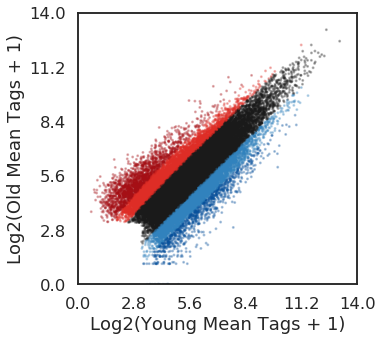

In [81]:
# set loop variables
mincount=8
thresh=[2,4]
thresh_color = {'down': ['#de2d26', '#a50f15'],
                'up': ['#3182bd', '#08519c']}
peak_count = {}

n_ticks = 5

for i, j in itertools.combinations(groups, 2):

    fig, ax = plt.subplots(figsize=(5,5))

    # filter low tag peaks
    df_tmp = avg_tags_df.loc[(avg_tags_df.loc[:, i] >= mincount) | (avg_tags_df.loc[:, j] >= mincount)]

    # set colors
    df_tmp['colors'] = 'k'
    df_tmp.loc[(df_tmp.loc[:, j] / (df_tmp.loc[:, i] + 1)) >= thresh[0], 'colors'] = thresh_color['up'][0]
    peak_count['up_'+str(thresh[0])] = ((df_tmp.loc[:, j] / (df_tmp.loc[:, i] + 1)) >= thresh[0]).sum()
    
    df_tmp.loc[(df_tmp.loc[:, j] / (df_tmp.loc[:, i] + 1)) <= 1/thresh[0], 'colors'] = thresh_color['down'][0]
    peak_count['down_'+str(thresh[0])] = ((df_tmp.loc[:, j] / (df_tmp.loc[:, i] + 1)) <= 1/thresh[0]).sum()
    
    df_tmp.loc[(df_tmp.loc[:, j] / (df_tmp.loc[:, i] + 1)) >= thresh[1], 'colors'] = thresh_color['up'][1]
    peak_count['up_'+str(thresh[1])] = ((df_tmp.loc[:, j] / (df_tmp.loc[:, i] + 1)) >= thresh[1]).sum()

    df_tmp.loc[(df_tmp.loc[:, j] / (df_tmp.loc[:, i] + 1)) <= 1/thresh[1], 'colors'] = thresh_color['down'][1]
    peak_count['down_'+str(thresh[1])] = ((df_tmp.loc[:, j] / (df_tmp.loc[:, i] + 1)) <= 1/thresh[1]).sum()

    ax.scatter(np.log2(df_tmp.loc[:, j]+1),
               np.log2(df_tmp.loc[:, i]+1),
               s=2,
               c=df_tmp.colors,
               alpha=0.3)

    # set axis limits
    countmax = np.max([np.max(np.log2(df_tmp.loc[:, j]+1)), np.max(np.log2(df_tmp.loc[:, i]+1))])
    ax.set_xlim([0,np.ceil(countmax)])
    ax.set_ylim([0,np.ceil(countmax)])
    
    # fix ticks
    ax.set_xticks(np.arange(0, np.ceil(countmax)+1, np.ceil(countmax) / n_ticks))
    ax.set_yticks(np.arange(0, np.ceil(countmax)+1, np.ceil(countmax) / n_ticks))
    
    # label axes
    ax.set_xlabel('Log2(%s Mean Tags + 1)' % i)
    ax.set_ylabel('Log2(%s Mean Tags + 1)' % j)
    
    # save plot
    plt.savefig('./figures/pairwise_scatter_quant_normalized.png', bbox_inches='tight')